<a href="https://colab.research.google.com/github/KhangKagTa19/NLP_Task/blob/main/AutoEncoderForVietnameseNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Autoencoder Model for Word Embedding**

#I. Import necessary things

In [ ]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.4 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import re
import os
import pickle
import nltk
import numpy as np
from scipy.spatial import distance
from unidecode import unidecode

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#II. Load corpus and preprocess it

In [ ]:
# Load data
def load_data(csv_file):
    return pd.read_csv(csv_file, encoding="utf-8")

train_data = load_data('/content/drive/MyDrive/NLP_LogisticClassification/Dataset.csv').iloc[:2000]
corpus = train_data["text"].to_list()
corpus = "\n".join(corpus)
print(corpus[:1000])

Trong khi đó, Indonesia với chiến thắng trước Việt Nam sẽ giúp họ tăng 2 bậc lên hạng 144 thế giới. Còn Malaysia sau bước nhảy vọt vào tháng trước cũng sẽ tụt 5 bậc, rơi xuống hạng 135 do thất bại ở Asian Cup 2023.
Như vậy, tổng cộng Việt Nam đã bị trừ 41,06 điểm và sẽ rơi từ hạng 94 xuống 105 thế giới trong bảng xếp hạng FIFA được công bố vào ngày 15-2 tới. Đây sẽ là lần đầu tiên sau 5 năm, đội tuyển Việt Nam rớt khỏi top 100 của FIFA.
Đến giờ, người hâm mộ bóng đá Việt Nam vẫn chưa hiểu tại sao trung vệ Thanh Bình lại nắm và kéo áo cầu thủ Indonesia một cách lộ liễu đến vậy. Nhất là khi đó là một tình huống trong vòng 16m50.
Không có gì chán hơn là làm việc và sống giữa những người mà ta không thích và cả những người không thích ta. Nếu biết cách chiếm cảm tình của người khác, chúng ta sẽ tự tin hơn, mà sự tự tin là một trong những điều kiện đưa đến thành công trong cuộc sống. Và nữa, một khi đã chiếm được cảm tình của ai đó cũng có nghĩa là ta lại có thêm một người bạn mới.  
 Mỗi n

In [ ]:
def text_cleaner(text):
    # Lowercase text
    text = text.lower()

    # Remove accents using unidecode
    text = unidecode(text)

    # Remove non-alphabetic characters
    text = re.sub("[^a-zA-Zàáạảãăắằẳẵặâấầẩẫậèéẹẻẽêếềểễệđìíịỉĩòóọỏõôốồổỗộơớờởỡợùúụủũưứừửữựỳýỵỷỹ]", " ", text)

    return text


In [ ]:
vietnamese_stopwords = set([
    "là", "và", "của", "có", "được", "không", "cho", "trong", "đến", "từ", "này", "qua", "nếu", "sẽ", "với"
])

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Assuming you have already defined text_cleaner_vietnamese function

def preprocess_text(corpus):
    corpus_clean = text_cleaner(corpus)

    stop_words = vietnamese_stopwords
    word_tokens = word_tokenize(corpus_clean)

    return [w for w in word_tokens if not w in stop_words]

corpus_token = preprocess_text(corpus)
print(corpus_token)

['khi', 'do', 'indonesia', 'voi', 'chien', 'thang', 'truoc', 'viet', 'nam', 'se', 'giup', 'ho', 'tang', 'bac', 'len', 'hang', 'the', 'gioi', 'con', 'malaysia', 'sau', 'buoc', 'nhay', 'vot', 'vao', 'thang', 'truoc', 'cung', 'se', 'tut', 'bac', 'roi', 'xuong', 'hang', 'do', 'that', 'bai', 'o', 'asian', 'cup', 'nhu', 'vay', 'tong', 'cong', 'viet', 'nam', 'da', 'bi', 'tru', 'diem', 'va', 'se', 'roi', 'tu', 'hang', 'xuong', 'the', 'gioi', 'bang', 'xep', 'hang', 'fifa', 'duoc', 'cong', 'bo', 'vao', 'ngay', 'toi', 'day', 'se', 'la', 'lan', 'dau', 'tien', 'sau', 'nam', 'doi', 'tuyen', 'viet', 'nam', 'rot', 'khoi', 'top', 'cua', 'fifa', 'den', 'gio', 'nguoi', 'ham', 'mo', 'bong', 'da', 'viet', 'nam', 'van', 'chua', 'hieu', 'tai', 'sao', 'trung', 've', 'thanh', 'binh', 'lai', 'nam', 'va', 'keo', 'ao', 'cau', 'thu', 'indonesia', 'mot', 'cach', 'lo', 'lieu', 'den', 'vay', 'nhat', 'la', 'khi', 'do', 'la', 'mot', 'tinh', 'huong', 'vong', 'm', 'khong', 'co', 'gi', 'chan', 'hon', 'la', 'lam', 'viec', 

In [ ]:

dictionary = sorted(list(set(corpus_token)))

if os.path.exists("mapping.pkl"):
    print("Load mapping")
    mapping = pickle.load(open("mapping.pkl", "rb"))
else:
    print("Save mapping")
    mapping = dict((c, i) for i, c in enumerate(dictionary))
    pickle.dump(mapping, open("mapping.pkl", "wb"))

print(dictionary)

Save mapping
['EUR', 'PS', 'a', 'aa', 'aas', 'aauco', 'aay', 'ab', 'abc', 'abdul', 'abdullah', 'aboubakar', 'abu', 'ac', 'acb', 'acbs', 'ace', 'aceh', 'ach', 'acnielsen', 'acs', 'adam', 'adams', 'adb', 'adel', 'adn', 'adnan', 'adrian', 'adriatic', 'adsl', 'advanced', 'aeroflot', 'aerospace', 'afa', 'afc', 'afcon', 'aff', 'afghanistan', 'afp', 'agf', 'ah', 'ahmadinejad', 'ai', 'aia', 'aims', 'air', 'airasia', 'airbus', 'airlines', 'airways', 'ait', 'ajunpa', 'ak', 'akdag', 'al', 'alabama', 'albright', 'album', 'alcaraz', 'aleksander', 'alexander', 'alfa', 'algeria', 'aliassime', 'all', 'allawi', 'alphan', 'alpines', 'alsom', 'am', 'amat', 'amateur', 'amboise', 'amer', 'american', 'amp', 'amposted', 'amsterdam', 'amsubject', 'an', 'ananda', 'anbar', 'and', 'andre', 'andrei', 'andy', 'angela', 'angeles', 'angelina', 'angers', 'angkor', 'angliss', 'anglo', 'angten', 'anh', 'annan', 'antar', 'anthony', 'antimoine', 'antony', 'ao', 'ap', 'apatit', 'apec', 'api', 'apollo', 'apolloedutrain', '

#III. Convert corpus to one-hot vectors & Define embedding dim

In [ ]:
embedding_dim = 256
vocab_size = len(dictionary)
print(vocab_size)

2922


In [ ]:
corpus_encode = [mapping[x] for x in corpus_token]
onehot_corpus = keras.utils.to_categorical(corpus_encode, num_classes=vocab_size)
print(onehot_corpus)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#IV. Define Autoencoder model

In [ ]:
ae_model = keras.Sequential()
ae_model.add(keras.Input(shape=(vocab_size,)))
ae_model.add(keras.layers.Dense(embedding_dim, activation='relu'))
ae_model.add(keras.layers.Dense(vocab_size, activation='softmax'))

ae_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

if os.path.exists("ae_model.h5"):
  ae_model.load_weights("ae_model.h5")

ae_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               748288    
                                                                 
 dense_1 (Dense)             (None, 2922)              750954    
                                                                 
Total params: 1499242 (5.72 MB)
Trainable params: 1499242 (5.72 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#V. Train AE model

In [ ]:
# Train model
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("ae_model.h5", monitor='val_loss', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

ae_model.fit(x=onehot_corpus, y=onehot_corpus, batch_size=512, epochs=150,
          validation_split=0.2, validation_freq=1, shuffle=True,
          callbacks=[checkpoint_cb, early_stopping_cb],
          workers=1, use_multiprocessing=False)

ae_model.save("ae_model.h5")

Epoch 1/150
300/300 [==============================] - 9s 23ms/step - loss: 3.4321 - accuracy: 0.7470 - val_loss: 0.8576 - val_accuracy: 0.9241
Epoch 2/150
  9/300 [..............................] - ETA: 3s - loss: 0.6610 - accuracy: 0.9405

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


300/300 [==============================] - 4s 14ms/step - loss: 0.4728 - accuracy: 0.9545 - val_loss: 0.5080 - val_accuracy: 0.9530
Epoch 3/150
300/300 [==============================] - 4s 13ms/step - loss: 0.2830 - accuracy: 0.9720 - val_loss: 0.4147 - val_accuracy: 0.9636
Epoch 4/150
300/300 [==============================] - 4s 13ms/step - loss: 0.2033 - accuracy: 0.9800 - val_loss: 0.3694 - val_accuracy: 0.9669
Epoch 5/150
300/300 [==============================] - 5s 15ms/step - loss: 0.1572 - accuracy: 0.9840 - val_loss: 0.3467 - val_accuracy: 0.9687
Epoch 6/150
300/300 [==============================] - 4s 15ms/step - loss: 0.1274 - accuracy: 0.9871 - val_loss: 0.3324 - val_accuracy: 0.9716
Epoch 7/150
300/300 [==============================] - 4s 13ms/step - loss: 0.1063 - accuracy: 0.9893 - val_loss: 0.3211 - val_accuracy: 0.9735
Epoch 8/150
300/300 [==============================] - 5s 16ms/step - loss: 0.0895 - accuracy: 0.9911 - val_loss: 0.3099 - val_accuracy: 0.9758
Epoc

#=======================================================================

# **How to use trained model**

#=======================================================================

#VI. Load trained model & Get output of 1st FC layer

In [ ]:
reconstructed_model = keras.models.load_model("ae_model.h5")
we_model = keras.models.Model(inputs=reconstructed_model.inputs, outputs=reconstructed_model.get_layer('dense').output)

Define function to encode one-hot list of words

In [ ]:
def encode_onehot(mapping, list_words):
  output = []

  for word in list_words:
    word_vector = [0 for _ in range(vocab_size)]

    if word in mapping.keys():
      word_index = mapping[word]
      word_vector[word_index] = 1

    output.append(word_vector)

  return output

#VII. Test model

In [ ]:
input_sentence = "The thao la khong ngung co gang"

preprocess_sentence = preprocess_text(input_sentence)
onehot_sentence = encode_onehot(mapping, preprocess_sentence)

embedded_sentence = we_model.predict(onehot_sentence)
print(embedded_sentence)

1/1 [==============================] - 0s 116ms/step
[[3.980746  4.612876  4.0088725 ... 4.7894154 4.885004  3.8538198]
 [4.654643  4.5172257 4.0971603 ... 4.7510715 4.759989  3.9396005]
 [3.987815  4.5673785 4.7492094 ... 4.8121214 4.910642  4.661404 ]
 ...
 [4.0852895 4.536403  4.0855794 ... 4.2609515 4.46157   4.5127625]
 [4.9230194 3.9900556 4.7777452 ... 4.9872313 5.0785966 4.4480596]
 [4.0238123 4.535336  4.827293  ... 4.0811777 4.097999  4.6087093]]


In [ ]:
word_0 = "bong"
word_1 = "hop"
word_2 = "hai"

preprocess_words = preprocess_text(' '.join([word_0, word_1, word_2]))
onehot_words = encode_onehot(mapping, preprocess_words)

word_0_eb, word_1_eb, word_2_eb = we_model.predict(onehot_words)

# print("OUTPUT EMBEDDING")
# print(word_0_eb)
# print(word_1_eb)
# print(word_2_eb)

dst_0_1 = distance.euclidean(word_0_eb, word_1_eb)
dst_1_2 = distance.euclidean(word_1_eb, word_2_eb)
dst_2_0 = distance.euclidean(word_2_eb, word_0_eb)

print("OUTPUT DISTANCE")
print("0 vs 1: ", dst_0_1)
print("1 vs 2: ", dst_1_2)
print("2 vs 0: ", dst_2_0)

1/1 [==============================] - 0s 33ms/step
OUTPUT DISTANCE
0 vs 1:  6.518953323364258
1 vs 2:  6.442107200622559
2 vs 0:  6.70385217666626


1/1 [==============================] - 0s 29ms/step


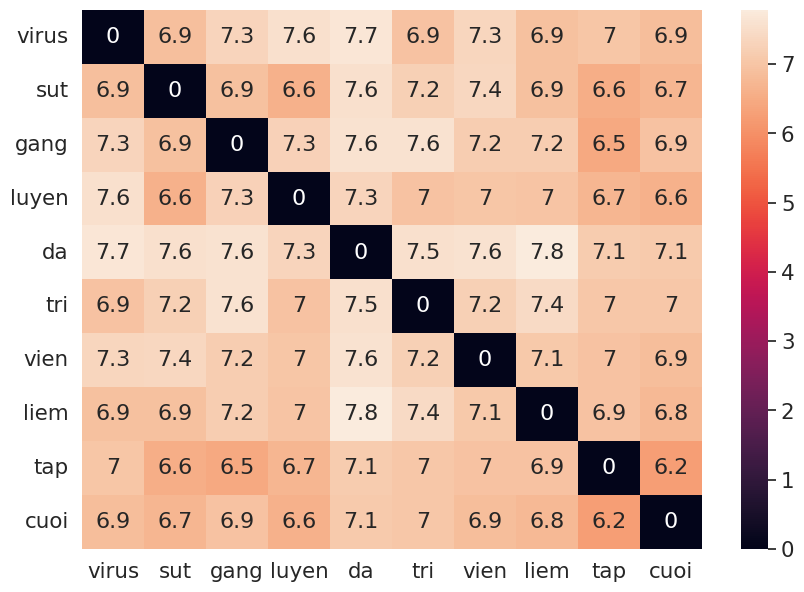

In [ ]:
from scipy.spatial import distance_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

list_words = ["virus", "sut", "gang", "luyen", "da", "tri", "vien", "liem", "tap", "cuoi"]
onehot_words = encode_onehot(mapping, list_words)
list_word_embs = we_model.predict(onehot_words)

dm = distance_matrix(list_word_embs, list_word_embs, p=2)

df_dm = pd.DataFrame(dm, list_words, list_words)
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_dm, annot=True, annot_kws={"size": 16}) # font size

plt.show()